# 1.Download the dataset: Dataset
##Load the dataset.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
data=pd.read_csv("titanic.csv")
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# 3.Perform Below Visualizations.
● Univariate Analysis
● Bi - Variate Analysis
● Multi - Variate Analysis

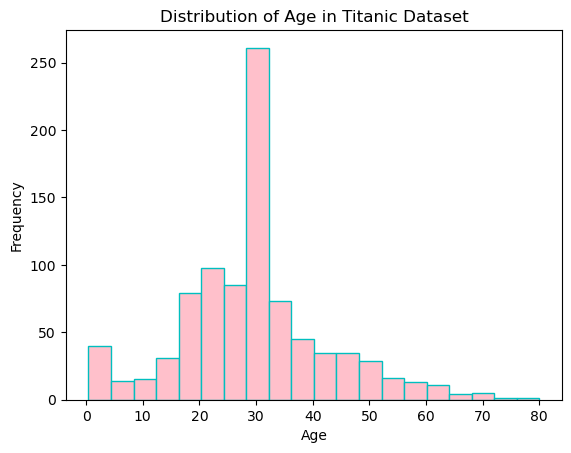

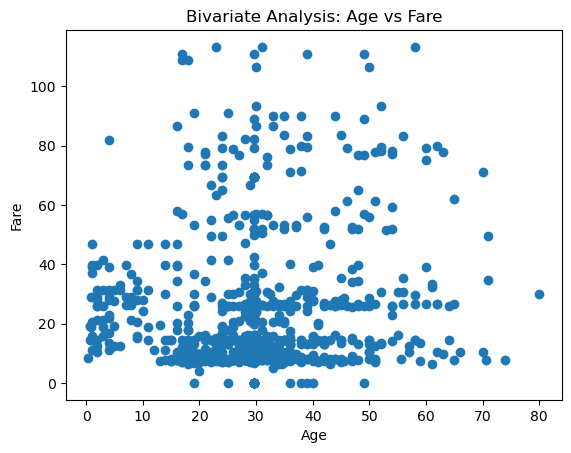

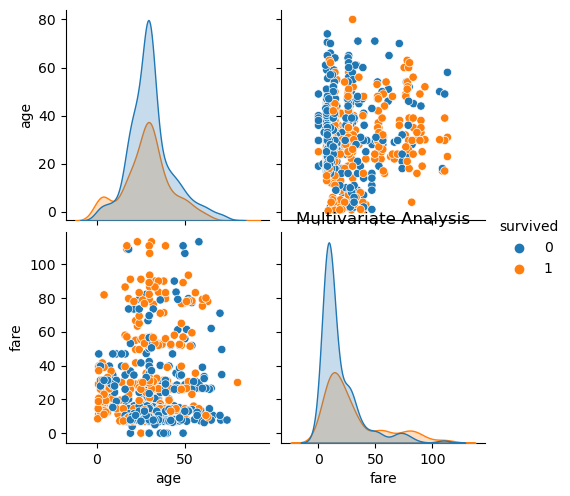

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: age, dtype: float64


In [31]:

# Select the "Age" variable for univariate analysis
age = data['age']
fare = data['fare']

# Create a histogram of the Age variable
plt.hist(age.dropna(), bins=20, edgecolor='c',color='pink')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age in Titanic Dataset')
plt.show()
#bivarent analysis
# Remove rows with missing values in Age or Fare
data_cleaned= data.dropna(subset=['age', 'fare'])

# Create a scatter plot of Age vs Fare
plt.scatter(data_cleaned['age'], data_cleaned['fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Bivariate Analysis: Age vs Fare')
plt.show()

#multivarient analysis
variables = ['age', 'fare', 'survived']

# Filter the dataset for non-null values in the selected variables
data_filtered = data[variables].dropna()

# Create a pairplot to visualize the relationships between variables
sns.pairplot(data_filtered, hue='survived')
plt.title('Multivariate Analysis')
plt.show()
# Calculate descriptive statistics
statistics = age.describe()
print(statistics)




# 4.Perform descriptive statistics on the dataset.

In [4]:

# Calculate descriptive statistics
statistics = age.describe()
print(statistics)



count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64


# 5.Handle the Missing values

In [25]:
# Impute missing values in a numerical column with mean
data['age'].fillna(data['age'].mean(), inplace=True)


# Impute missing values in a numerical column with median
data['fare'].fillna(data['fare'].median(), inplace=True)


# Impute missing values in a categorical column with mode
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)
data['deck'].fillna(data['deck'].mode()[0], inplace=True)

data



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# 6.Find the outliers and replace the outliers



In [17]:
# Select the column with potential outliers
column_with_outliers = 'age'

# Calculate the Z-score for each data point
z_scores = np.abs(stats.zscore(data[column_with_outliers]))

# Set a threshold for outlier detection 
threshold = 3

# Find the indices of outliers
outlier_indices = np.where(z_scores > threshold)[0]

# Replace outliers with a specified value (e.g., median of the column)
replacement_value = data[column_with_outliers].median()
data.loc[outlier_indices, column_with_outliers] = replacement_value

# Display 
print(data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


# 7.Check for Categorical columns and perform encoding

In [8]:
# Check for categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
print("Categorical columns:")
print(categorical_cols)

# Perform one-hot encoding on categorical columns
encoded_df = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Display 
print(encoded_df.head())

Categorical columns:
Index(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'], dtype='object')
   survived  pclass   age  sibsp  parch     fare  adult_male  alone  sex_male  \
0         0       3  22.0      1      0   7.2500        True  False         1   
1         1       1  38.0      1      0  71.2833       False  False         0   
2         1       3  26.0      0      0   7.9250       False   True         0   
3         1       1  35.0      1      0  53.1000       False  False         0   
4         0       3  35.0      0      0   8.0500        True   True         1   

   embarked_Q  ...  who_woman  deck_B  deck_C  deck_D  deck_E  deck_F  deck_G  \
0           0  ...          0       0       0       0       0       0       0   
1           0  ...          1       0       1       0       0       0       0   
2           0  ...          1       0       0       0       0       0       0   
3           0  ...          1       0       1       0       0       0       0

# 8.Split the data into dependent and independent variables.

In [5]:
# Select the independent variables (features)
indep = data[['age', 'fare', 'sex', 'pclass']]

# Select the dependent variable (target)
depen = data['survived']

# Display the independent variables
print(indep.head())

# Display the dependent variable
print(depen.head())

    age     fare     sex  pclass
0  22.0   7.2500    male       3
1  38.0  71.2833  female       1
2  26.0   7.9250  female       3
3  35.0  53.1000  female       1
4  35.0   8.0500    male       3
0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


# 9.Scale the independent variables

In [13]:
from sklearn.preprocessing import StandardScaler
# Select the independent variables to scale
independent_vars = ['age', 'fare']

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the independent variables
data[independent_vars] = scaler.fit_transform(data[independent_vars])

# Display the scaled independent variables
print(data[independent_vars].head())

        age      fare
0 -0.530377 -0.502445
1  0.571831  0.786845
2 -0.254825 -0.488854
3  0.365167  0.420730
4  0.365167 -0.486337


# 10.Split the data into training and testing

In [12]:
from sklearn.model_selection import train_test_split
features = ['age', 'fare']
target = 'survived'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print('Training set shape:', X_train.shape, y_train.shape)
print('Testing set shape:', X_test.shape, y_test.shape)

Training set shape: (712, 2) (712,)
Testing set shape: (179, 2) (179,)
